# Task 3: Bifurcations in higher dimensions

### The Andronov-Hopf bifurcation can be written as: 
###  $\dot x_1 = \alpha x_1 - x_2 - x_1(x_1^2+x_2^2)$
###  $\dot x_2 = x_1 +\alpha x_2 - x_2(x_1^2+x_2^2)$
###  1. Visualize the bifurcation of the system by plotting three phase diagrams at representative values of $\alpha$.

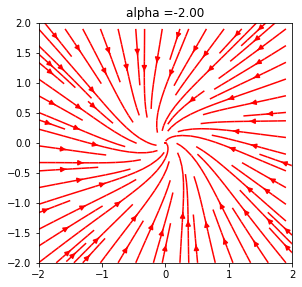

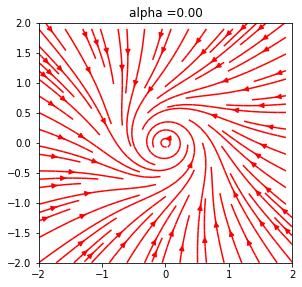

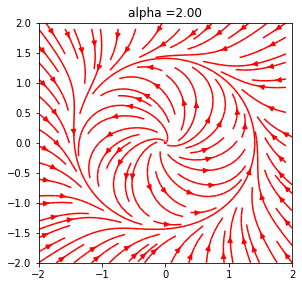

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.integrate import solve_ivp
from collections import defaultdict
from functools import partial 
import scipy.integrate
from mpl_toolkits.mplot3d import axes3d
import matplotlib.patches as mpatches

w = 2
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]

for alpha in [-2, 0 ,2]:  
    U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(x1, x2, U, V, color='red')
    ax0.set_title("alpha =" + f"{alpha:.2f}")

### 2. For $\alpha = 1$, numerically compute and visualize two orbits of the system at the point (2,0) and (0.5,0).

Text(0.5, 1.0, 'Two Orbits for α = 1 with initial value (0.5,0)')

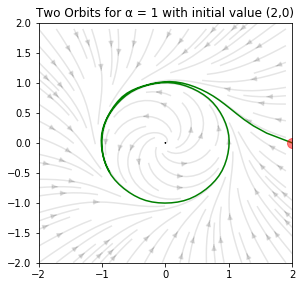

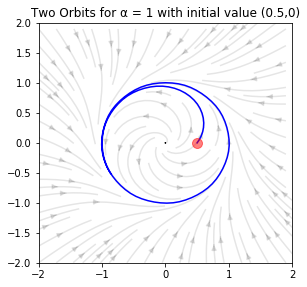

In [13]:
alpha = 1

def f(t, r):
    x1, x2 = r
    f1 = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    f2 = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return f1, f2

solution_1 = solve_ivp(f, (0, 10), (2, 0), t_eval=np.linspace(0, 10, 100))
xf, yf = solution_1.y

solution_2 = solve_ivp(f, (0, 10), (0.5, 0), t_eval=np.linspace(0, 10, 100))
xs, ys = solution_2.y

U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(x1, x2, U, V, color=(0,0,0,.1))
ax0.plot(xf, yf, color='green')
ax0.plot([2], [0], 'ok', ms=10, color='r', alpha=0.5)
ax0.set_title(f"Two Orbits for \u03B1 = {alpha} with initial value (2,0)")

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.streamplot(x1, x2, U, V, color=(0,0,0,.1))
ax1.plot(xs, ys, color='blue')
ax1.plot([0.5], [0], 'ok', ms=10, color='r', alpha=0.5)
ax1.set_title(f"Two Orbits for \u03B1 = {alpha} with initial value (0.5,0)")

### 3. Visualize the bifurcation surface of the cusp bifurcation in a 3D plot.

C:\Users\lishi\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: No contour levels were found within the data range.


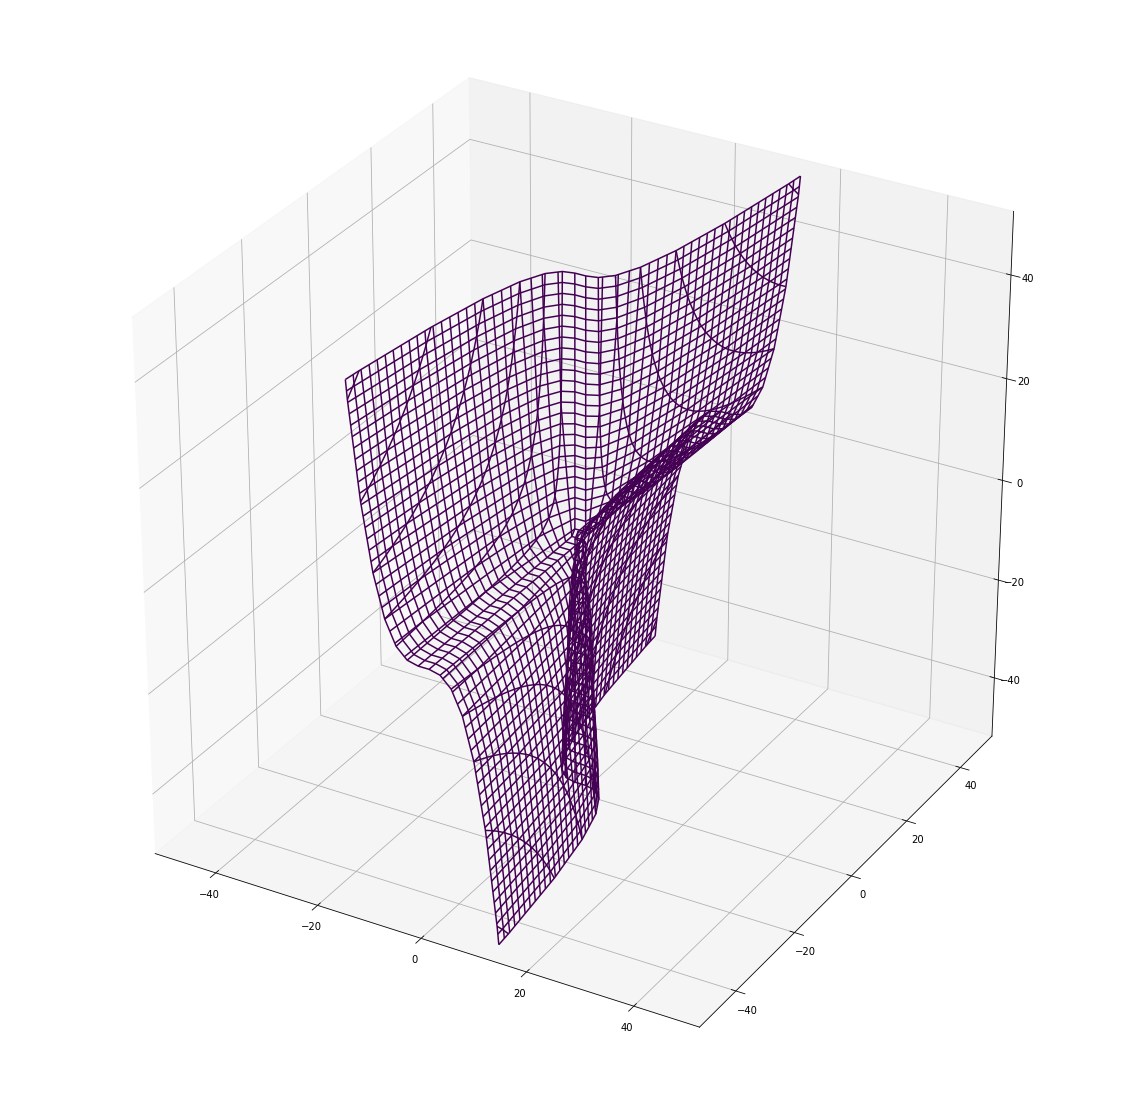

In [17]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
    
def plot_cusp(f, bound=50):
    
    # The parameters of plotted function are defined as: X: alpha1 | Y: alpha2 | Z: X
    
    a = np.linspace(-bound, bound, 50) # Resolution of the contour.
    b = np.linspace(-bound, bound, 50) # Number of slices.
    m,n = np.meshgrid(a,a) # Grid on which the contour will be plotted.

    # Plot contours in the XY plane.
    for z in b: 
        X,Y = m,n
        Z = f(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z.

    # Plot contours in the XZ plane.
    for y in b: 
        X,Z = m,n
        Y = f(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    # Plot contours in the YZ plane.    
    for x in b:
        Y,Z = m,n
        X = f(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # Plot limits.
    ax.set_zlim3d(-bound,bound)
    ax.set_xlim3d(-bound,bound)
    ax.set_ylim3d(-bound,bound)

    plt.show()

#  Normal form of cusp bifurcation
def cusp(x,y,z):
    return x+y*z-x**3

plot_cusp(cusp)